https://github.com/lukemelas/EfficientNet-PyTorch/blob/master/examples/simple/example.ipynb

In [1]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16032 sha256=16eb25319a5e2341d8ffc13263f427b67d34aaafecc9958d7f680d81acaa7634
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch


## Example

In this simple example, we load an image, pre-process it, and classify it with a pretrained EfficientNet.

In [2]:
import json
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

In [3]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

In [4]:
# Open image
img = Image.open('https://github.com/lukemelas/EfficientNet-PyTorch/blob/master/examples/simple/img.jpg')
img

FileNotFoundError: ignored

In [15]:
url = 'https://img.freepik.com/free-photo/smiling-woman-glasses-stands-with-arms-crossed-isolated_2221-5206.jpg?size=626&ext=jpg' #@param {type:"string"}

In [16]:
import requests
import PIL

In [17]:
from io import BytesIO

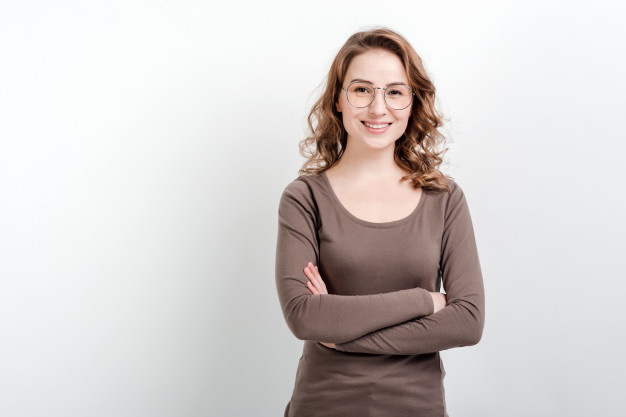

In [18]:
response = requests.get(url)
img = PIL.Image.open(BytesIO(response.content)).convert("RGB")
img

In [19]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

In [20]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

FileNotFoundError: ignored

In [21]:
text = 'https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt'

In [22]:
# Load class names
labels_map = json.load(open(text))
labels_map = [labels_map[str(i)] for i in range(1000)]

FileNotFoundError: ignored

In [23]:
text_get = requests.get(text)

In [24]:
# Load class names
labels_map = json.load(open(text_get))
labels_map = [labels_map[str(i)] for i in range(1000)]

TypeError: ignored

In [25]:
# Load class names
labels_map = json.load(open(text_get.text))
labels_map = [labels_map[str(i)] for i in range(1000)]

OSError: ignored

In [26]:
# Load class names
labels_map = json.load(text_get.text)
labels_map = [labels_map[str(i)] for i in range(1000)]

AttributeError: ignored

In [27]:
# Load class names
labels_map = text_get.text
labels_map = [labels_map[str(i)] for i in range(1000)]

TypeError: ignored

In [28]:
# Load class names
labels_map = json.load(text_get.read())
labels_map = [labels_map[str(i)] for i in range(1000)]

AttributeError: ignored

In [29]:
# Load class names
labels_map = json.load(text_get)
labels_map = [labels_map[str(i)] for i in range(1000)]

AttributeError: ignored

In [30]:
# Load class names
labels_map = json.loads(text_get)
labels_map = [labels_map[str(i)] for i in range(1000)]

TypeError: ignored

https://stackoverflow.com/a/19474907/13807465

In [31]:
# Load class names
labels_map = json.loads(text_get.text)
labels_map = [labels_map[str(i)] for i in range(1000)]

In [32]:
# Classify with EfficientNet
model = EfficientNet.from_pretrained(model_name)
model.eval()
with torch.no_grad():
    logits = model(img)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0
-----
miniskirt, mini                                                             (9.02%)
sweatshirt                                                                  (5.31%)
jean, blue jean, denim                                                      (5.28%)
web site, website, internet site, site                                      (4.64%)
brassiere, bra, bandeau                                                     (3.73%)
